<a href="https://colab.research.google.com/github/rasoco/master_data_science/blob/master/TFM/Data%20Exploration/DataExploration_BiciMadProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BiciMad Project  - Master Data Science KSchool Ed.019**



## Conect with GPU of Google 



In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU no encontrada')
print('Encontrada GPU: {}'.format(device_name))

Encontrada GPU: /device:GPU:0


In [ ]:
# !pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
drive

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Madrid Stations Dataset

###Load of the libraries


In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium # To display maps with coordinates and markers.
import geopy # For geocoding and reverse geocoding.


### Data Acquisition of Madrid Stations dataset


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/originalbikestations.csv", sep=';', encoding='utf-8') #decimal is okey
del df['Unnamed: 10']
df['Year'] = pd.DatetimeIndex(df['Fecha de Alta']).year
year = df['Year']
df = df.rename(columns = {'Número':'id','Número de Plazas':'Anclajes'}) #change de name of column Número
df.head()

id      Gis_X  ...                                DIRECCION  Year
0  001 a  440443,61  ...                       CALLE DE ALCALA, 2  2019
1  001 b  440480,56  ...                       CALLE DE ALCALA, 6  2020
2      2  440134,83  ...                  CALLE DE MIGUEL MOYA, 1  2014
3      3  440012,98  ...   PLAZA DEL CONDE DEL VALLE DE SUCHIL, 2  2014
4      4   440396,4  ...             CALLE DE MANUELA MALASAÑA, 3  2014

[5 rows x 14 columns]

In [ ]:
df['ids'] = df['id'].str.rstrip('ampliacionb') #to get only number values
# df_stations = df_stations[onlycolumns]
df['ids'] = df['ids'].astype(int).sort_values() #change values ids and order
df.head()

id      Gis_X  ...  Year ids
0  001 a  440443,61  ...  2019   1
1  001 b  440480,56  ...  2020   1
2      2  440134,83  ...  2014   2
3      3  440012,98  ...  2014   3
4      4   440396,4  ...  2014   4

[5 rows x 15 columns]

### Data Exploration


#### Grouping Distrito and show values unique and not unique of "id"

In [ ]:
df.groupby('Distrito')['ids']\
      .agg(['nunique', 'unique'])\
      .sort_values(by='nunique', ascending=False)

nunique                                             unique
Distrito                                                                          
01  CENTRO                   57  [1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, ...
04  SALAMANCA                37  [87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 9...
03  RETIRO                   26  [60, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 7...
07  CHAMBERÍ                 24  [3, 8, 111, 122, 123, 124, 125, 126, 127, 128,...
02  ARGANZUELA               22  [46, 47, 118, 119, 120, 121, 162, 163, 164, 16...
05  CHAMARTÍN                18  [136, 137, 139, 140, 146, 147, 148, 149, 150, ...
06  TETUÁN                   11  [133, 151, 152, 153, 154, 155, 156, 204, 205, ...
09  MONCLOA-ARAVACA           9       [14, 110, 112, 113, 114, 115, 116, 117, 161]
15  CIUDAD LINEAL             2                                         [188, 189]
13  PUENTE DE VALLECAS        1                                              [179]

In [ ]:
def agrupation(b,c):
    # b = ""
    # c = ""
    a = df.groupby('b')['c'].agg(['nunique','unique'])
    print(a)


In [ ]:
# Name of values unique of Distrito
df['Distrito'].unique()

array(['01 \xa0CENTRO', '07 \xa0CHAMBERÍ', '09 \xa0MONCLOA-ARAVACA',
       '02 \xa0ARGANZUELA', '03 \xa0RETIRO', '04 \xa0SALAMANCA',
       '06 \xa0TETUÁN', '05 \xa0CHAMARTÍN', '13 \xa0PUENTE DE VALLECAS',
       '15 \xa0CIUDAD LINEAL'], dtype=object)

#### Analysis of total Barrio per Distrito


In [ ]:
d_b = df.groupby(['Distrito'])['Barrio'].count()
d_b


Distrito
01  CENTRO                60
02  ARGANZUELA            22
03  RETIRO                27
04  SALAMANCA             38
05  CHAMARTÍN             18
06  TETUÁN                11
07  CHAMBERÍ              26
09  MONCLOA-ARAVACA       11
13  PUENTE DE VALLECAS     1
15  CIUDAD LINEAL          2
Name: Barrio, dtype: int64

#### Show graphic of the Bike Station by Distrito

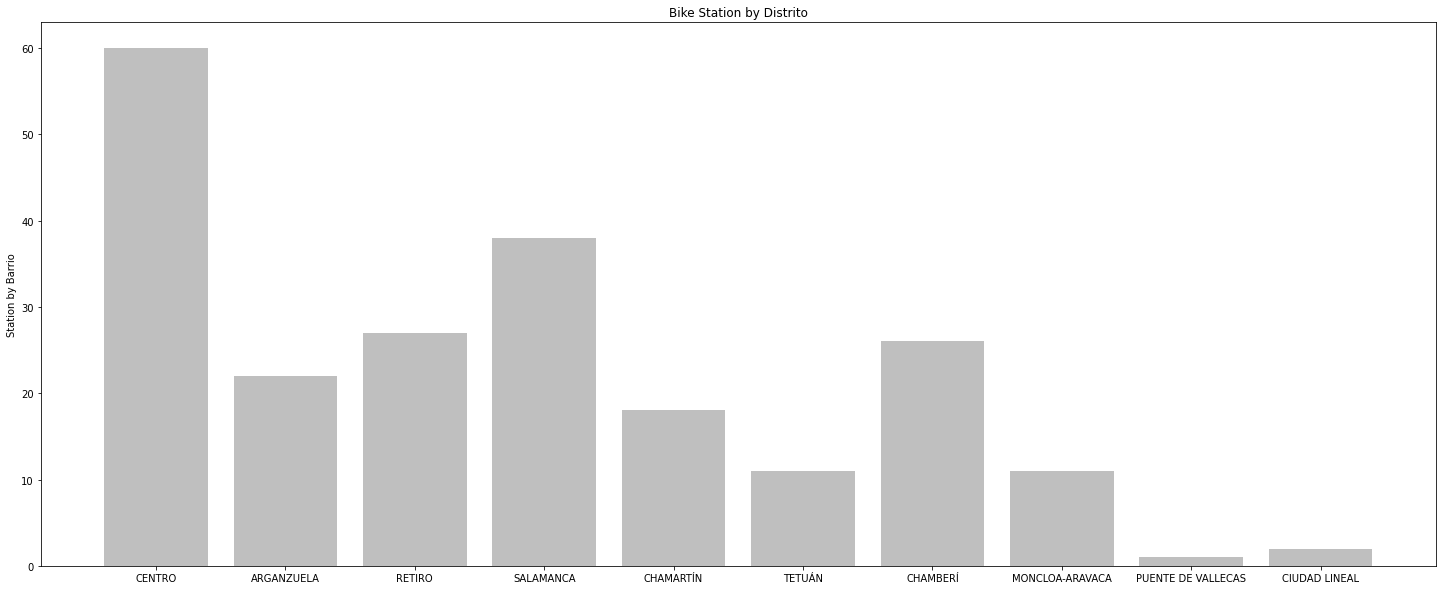

In [ ]:
import matplotlib.pyplot as plt
# fig = plt.figure()
# fig.add_axes(langs)
langs = ['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN', 'TETUÁN', 'CHAMBERÍ', 'MONCLOA-ARAVACA', 'PUENTE DE VALLECAS', 'CIUDAD LINEAL']
# ax.bar(langs,aa)
# plt.show()
fig=plt.figure()
fig.set_figheight(10)
fig.set_figwidth(25)
fig.set_facecolor('white')
y_pos = np.arange(len(langs))
plt.bar(y_pos, d_b, align='center', alpha=0.5, width=0.8, color = 'gray')
plt.xticks(y_pos, langs)
plt.ylabel('Station by Barrio')
plt.title('Bike Station by Distrito')

plt.show()

In [ ]:
df.groupby('Distrito')['Anclajes'].agg(['count', 'sum', 'mean']).sort_values(by='sum', ascending=False)

count   sum       mean
Distrito                                      
01  CENTRO                 60  1419  23.650000
04  SALAMANCA              38   906  23.842105
03  RETIRO                 27   664  24.592593
07  CHAMBERÍ               26   584  22.461538
02  ARGANZUELA             22   541  24.590909
05  CHAMARTÍN              18   426  23.666667
06  TETUÁN                 11   258  23.454545
09  MONCLOA-ARAVACA        11   243  22.090909
15  CIUDAD LINEAL           2    51  25.500000
13  PUENTE DE VALLECAS      1    24  24.000000

#### Total Anclaje by Year

In [ ]:
df.groupby('Year')['Anclajes'].agg(['sum'])

sum
Year      
2014  2872
2015   939
2016    24
2017    44
2018    15
2019  1147
2020    75

In [ ]:
df['Anclajes'].sum()

5116

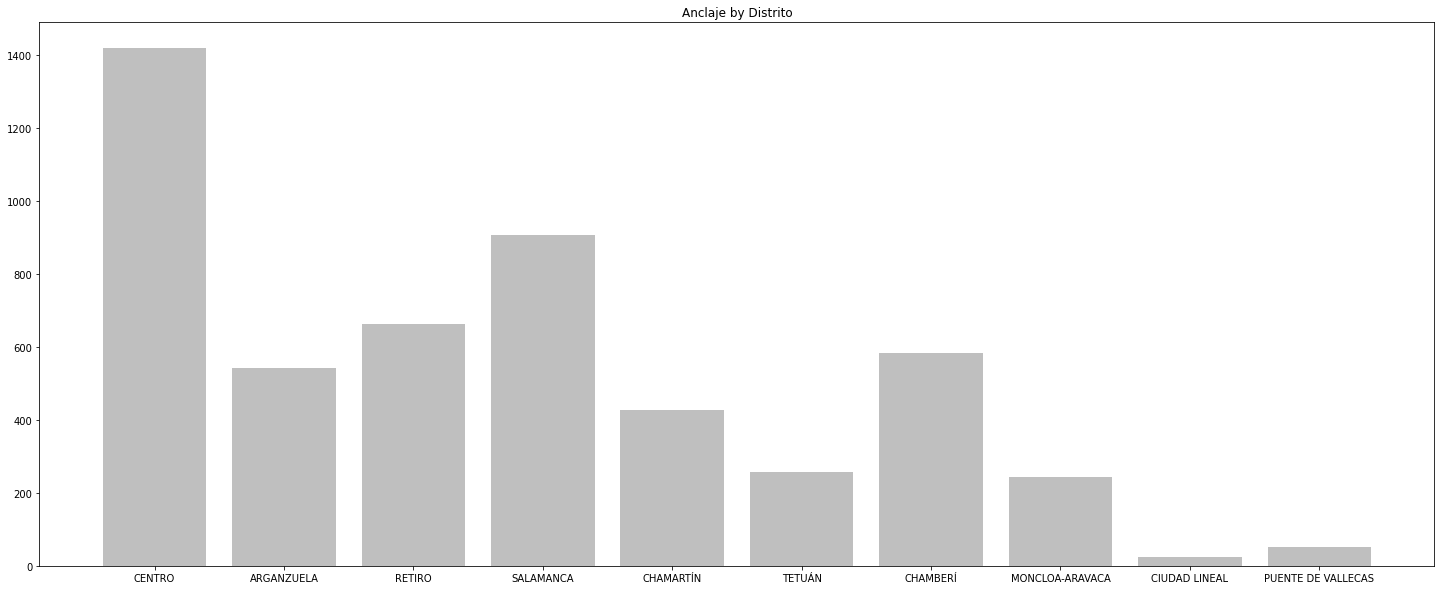

In [ ]:
d_a = df.groupby('Distrito')['Anclajes'].sum()
langs = ['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN', 'TETUÁN', 'CHAMBERÍ', 'MONCLOA-ARAVACA', 'CIUDAD LINEAL', 'PUENTE DE VALLECAS']
# ax.bar(langs,aa)
# plt.show()
fig=plt.figure()
fig.set_figheight(10)
fig.set_figwidth(25)
fig.set_facecolor('white')
y_pos = np.arange(len(langs))
plt.bar(y_pos, d_a, align='center', alpha=0.5, width=0.8, color = 'gray')
plt.xticks(y_pos, langs)
# plt.ylabel('Anclaje by Disti')
plt.title('Anclaje by Distrito')

plt.show()

In [ ]:
df.columns

Index(['id', 'Gis_X', 'Gis_Y', 'Fecha de Alta', 'Distrito', 'Barrio', 'Calle',
       'Nº Finca', 'Tipo de Reserva', 'Anclajes', 'LONGITUD', 'LATITUD',
       'DIRECCION', 'Year', 'ids'],
      dtype='object')

Text(0.5, 1.0, 'Total de Anclajes por Distrito y Año')

<Figure size 3600x10800 with 0 Axes>

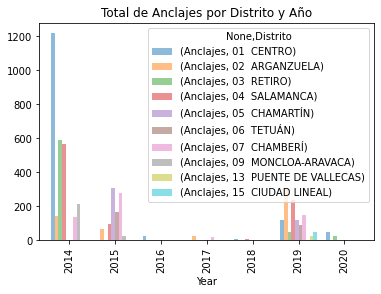

In [ ]:
year_distrito = df.groupby(['Year','Distrito']).agg({'Anclajes': 'sum'})
fig1=plt.figure()
# rect = l,b,w,h
# fig1.add_axes(rect, frameon=False, axisbg='g')
# fig1.add_axes([2014, 2015, 2016, 2017, 2018, 2019, 2020])
# fig1.subplots_adjust(wspace=0.9, hspace=0.9)
fig1.set_figheight(150)
fig1.set_figwidth(50)
fig.set_facecolor('white')
# plt.bar(align='center', alpha=0.5, width=0.8, color = 'gray')

year_distrito.unstack().plot.bar(align='center', alpha=0.5, width=0.8)
plt.title("Total de Anclajes por Distrito y Año")


In [ ]:
# plt.figure(figsize=[10,8])
# # x=d_a
# # x=d_b
# # n,bins,pat.hist([x,y])

# plt.hist([d_a,d_b])

In [ ]:
d_e = df.groupby('id')['Distrito'].sum()
d_e

id
001 a                01  CENTRO
001 b                01  CENTRO
020 ampliacion       01  CENTRO
025 a                01  CENTRO
025 b                01  CENTRO
                      ...      
95                04  SALAMANCA
96                04  SALAMANCA
97                04  SALAMANCA
98                04  SALAMANCA
99                04  SALAMANCA
Name: Distrito, Length: 216, dtype: object

### Maps

  #### Get of coordinates (Longitude and Latitude)








In [ ]:
locations = df[['LATITUD', 'LONGITUD']] # (Y, X)
locationlist = locations.values.tolist()
len(locationlist)
# locationlist 


216

In [ ]:
df['Locationlist'] = locationlist

#### Scatterplot of X, Y

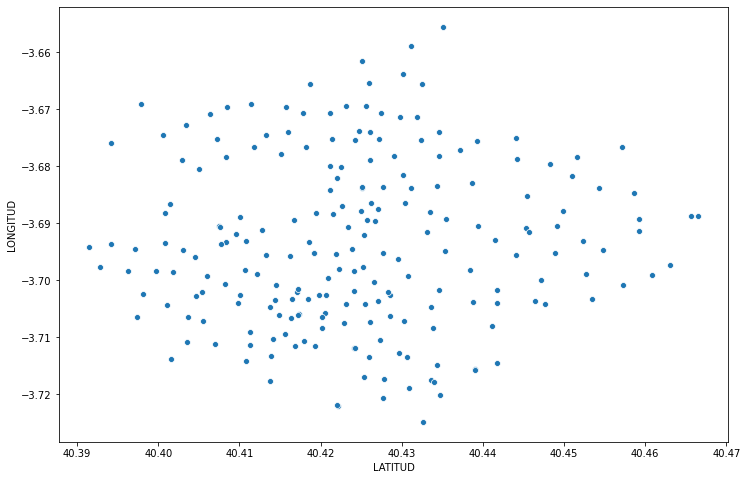

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(df['LATITUD'], df['LONGITUD'])

#### Testing of map

In [ ]:
import pandas as pd
import numpy as np
# import streamlit as st
import matplotlib.pyplot as plt
# import folium.plugins
# import plotly.express as px
from folium.plugins import MarkerCluster
# from bokeh.plotting import figure, output_file, show
# from streamlit_folium import folium_static

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/originalbikestations.csv", sep=';', encoding='utf-8')
df['Year'] = pd.DatetimeIndex(df['Fecha de Alta']).year
year = df['Year']
df = df.rename(columns = {'Número':'id','Número de Plazas':'Anclajes'}) #change de name of column Número
df['ids'] = df['id'].str.rstrip('ampliacionb') #to get only number values
# df_stations = df_stations[onlycolumns]
df['ids'] = df['ids'].astype(int).sort_values() #change values ids and order

d_b = df.groupby(['Distrito'])['Barrio'].count()

locations = df[['LATITUD', 'LONGITUD']] # (Y, X)
locationlist = locations.values.tolist()
df['Locationlist'] = locationlist

map1 = folium.Map(location=[40.417110795315295, -3.70199802576925], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['id'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(map1)
map1  

In [ ]:
df.columns

Index(['id', 'Gis_X', 'Gis_Y', 'Fecha de Alta', 'Distrito', 'Barrio', 'Calle',
       'Nº Finca', 'Tipo de Reserva', 'Anclajes', 'Unnamed: 10', 'LONGITUD',
       'LATITUD', 'DIRECCION', 'Year', 'ids', 'Locationlist'],
      dtype='object')

#### Display of bike map in Madrid

In [ ]:
map1 = folium.Map(location=[40.417110795315295, -3.70199802576925], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['id'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(map1)
map1  

#### Display of BikeMadrid per Distrito

In [ ]:
import folium.plugins
folium.plugins.MarkerCluster()
map2 = folium.Map(location=[40.417110795315295, -3.70199802576925], tiles='Stamen Terrain', zoom_start=11)

marker_cluster = folium.plugins.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Distrito'][point], icon=folium.Icon(color='darkblue', icon_color='green', icon='bicycle', angle=0, prefix='fa')).add_to(marker_cluster)
map2

In [ ]:
import plotly.express as px
fig = px.scatter_geo(df, locations=df['Locationlist'], locationmode='country names', color= df['Distrito'].sort_values(), hover_name=df['Calle'],
                     size=df['Anclajes'], scope='europe', 
                     animation_frame=df['Year'].sort_values(), 
                     projection='stereographic')
# (df, locations="Locationlist", hover_name="Distrito", animation_frame="Year", projection="natural earth")
fig.show()

### Only Stations 2019

In [ ]:
stations_2019 = df[df['Year'] <= 2019] #save the 2019 stations data for use to jan18
# stations_2019['idunplug_station'] = stations_2019['ids']
# stations_2019['idplug_station'] = stations_2019['ids']
# stations_2019 = stations_2019


In [ ]:
stations_2019.to_csv("stations_2019")

## January 18 BiciMad Dataset

####Load of Libraries

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn 

####Acquiring data

In [ ]:
downloaded = drive.CreateFile({'id':'1dBJtPkHMvyF5Pmeu-w8z-Y91smROB_6b'})
downloaded.GetContentFile('jan18.json')
# downloaded.GetContentFile('jan18_clean.json')

In [ ]:
print(os.getcwd)

<built-in function getcwd>


#### Reading and Exploring data

In [ ]:
jan18 = pd.read_json("jan18.json",encoding="utf-8", lines=True, dtype='frame')# open de file

In [ ]:
jan18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263702 entries, 0 to 263701
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   _id               263702 non-null  object
 1   user_day_code     263702 non-null  object
 2   idplug_base       263702 non-null  int64 
 3   user_type         263702 non-null  int64 
 4   idunplug_base     263702 non-null  int64 
 5   travel_time       263702 non-null  int64 
 6   idunplug_station  263702 non-null  int64 
 7   ageRange          263702 non-null  int64 
 8   idplug_station    263702 non-null  int64 
 9   unplug_hourTime   263702 non-null  object
 10  zip_code          263702 non-null  object
dtypes: int64(7), object(4)
memory usage: 22.1+ MB


In [ ]:
# Save of position in _id column 
position = dict(enumerate(jan18['_id'].values))
position
type(position)
ids = []
# Save of values in its position 
ids = []
for d, v in position.items():
    ids += list(v.values())
#Save in the column _id
jan18['_id'] = ids 

In [ ]:
na_columns = ['_id', 'user_day_code', 'idunplug_station', 'idunplug_base', 'idplug_station', 'idplug_base',
   'user_type','travel_time','unplug_hourTime', 'ageRange', 'zip_code']
jan18 = jan18[na_columns]
jan18 = jan18.rename(columns = {'_id':'id'})

# jan18.columns = ['_id', 'user_day_code', 'idunplug_base','idunplug_station','idplug_base', 'idplug_station',
#        'user_type','travel_time','unplug_hourTime', 'ageRange', 'zip_code']

In [ ]:
# jan18.to_csv('jan18_clean.csv') # to save the dataset

In [ ]:
jan18.head(1000)

id  ... zip_code
0    5a505acd2f384319304ed614  ...    28010
1    5a505acd2f384319304ed615  ...         
2    5a505acd2f384319304ed616  ...         
3    5a505acd2f384319304ed617  ...    28005
4    5a505acd2f384319304ed619  ...    28004
..                        ...  ...      ...
995  5a505ad12f384319304eda71  ...    28003
996  5a505ad12f384319304eda73  ...    28009
997  5a505ad12f384319304eda72  ...         
998  5a505ad12f384319304eda74  ...    28001
999  5a505ad12f384319304eda75  ...    28007

[1000 rows x 11 columns]

In [ ]:
# jan18[jan18['idplug_station'] == 2008] #show the result

In [ ]:
jan18 = jan18.drop(jan18[jan18.idplug_station == 2008].index) #deleting values 2008

In [ ]:
jan18.isna().sum()

id                  0
user_day_code       0
idunplug_station    0
idunplug_base       0
idplug_station      0
idplug_base         0
user_type           0
travel_time         0
unplug_hourTime     0
ageRange            0
zip_code            0
dtype: int64

In [ ]:
# About null 
jan18.isnull().sum()

id                  0
user_day_code       0
idunplug_station    0
idunplug_base       0
idplug_station      0
idplug_base         0
user_type           0
travel_time         0
unplug_hourTime     0
ageRange            0
zip_code            0
dtype: int64

## Unification processing Dataset (Jan18 and Stations_2019)

####Proceso Unificado

In [ ]:
new_dataset = pd.merge(jan18, stations_2019, on='idunplug_station')
new_dataset = new_dataset.rename(columns={'Gis_X':'Gis_Xidunplug',
       'Gis_Y':'Gis_Yidunplug', 'Fecha de Alta':'Fecha de Alta_idunplug', 'Distrito':'Distrito_idunplug', 'Barrio':'Barrio_idunplug', 'Calle':'Calle_idunplug', 'Nº Finca':'Nº Finca_idunplug',
        'Anclajes':'Anclajes_idunplug', 'Longitud':'Longitud_idunplug', 'Latitud':'Latitud_idunplug', 'DIRECCION':'DIRECCION_idunplug',
       'Year':'Year_idunplug', 'Locationlist':'Locationlist_idunplug', 'X':'X_idunplug', 'Y':'Y_idunplug'}) #change de name of the columns

del new_dataset['ids']
another_dataset = pd.merge(jan18,stations_2019, on = 'idplug_station')

another_dataset = another_dataset.rename(columns={'Gis_X':'Gis_Xidplug',
       'Gis_Y':'Gis_Yidplug', 'Fecha de Alta':'Fecha de Alta_idplug', 'Distrito':'Distrito_idplug', 'Barrio':'Barrio_idplug', 'Calle':'Calle_idplug', 'Nº Finca':'Nº Finca_idplug',
        'Anclajes':'Anclajes_idplug', 'Longitud':'Longitud_idplug', 'Latitud':'Latitud_idplug', 'DIRECCION':'DIRECCION_idplug',
       'Year':'Year_idplug', 'Locationlist':'Locationlist_idplug', 'X':'X_idplug', 'Y':'Y_idplug'})
del another_dataset['ids']

another_dataset.to_csv("another_dataset")
new_dataset.to_csv("new_dataset")# to save
new_dataset = pd.merge(jan18, stations_2019, on='idunplug_station') #join jan18 and stations_2019 using idunplug_station

join_data = pd.merge(new_dataset, another_dataset, on=['user_day_code'])

In [ ]:
# another_dataset = pd.merge(jan18,stations_2019, on = 'idplug_station', indicator=True, how='left') #que tipo de merge hace en cada fila 
another_dataset.head(2)

##**Unified data of Jan18 and Stations 2019**

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn 

### Acquiring data

In [ ]:
data = pd.read_json("/content/drive/My Drive/Colab Notebooks/data/join_data", encoding="utf-8", dtype="frame")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926629 entries, 0 to 2926628
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id_x_x             object 
 1   user_day_code      object 
 2   idunplug_station   int64  
 3   Distrito_idunplug  object 
 4   Barrio_idunplug    object 
 5   Longitud_idunplug  float64
 6   Latitud_idunplug   float64
 7   idplug_station_x   int64  
 8   Distrito_idplug    object 
 9   Barrio_idplug      object 
 10  Longitud_idplug    float64
 11  Latitud_idplug     float64
 12  user_type_x        int64  
 13  travel_time_x      int64  
 14  unplug_hourTime_x  object 
 15  ageRange_x         int64  
 16  zip_code_x         object 
dtypes: float64(4), int64(5), object(8)
memory usage: 401.9+ MB


In [ ]:
# missing_values_count = data.isnull().sum().sum()
# missing_values_count

In [ ]:
# Cleaning columns 
# data.columns
data = data.rename(columns={'id_x_x': '_id','idplug_station_x':'idplug_station',
       'user_type_x':'user_type', 'travel_time_x':'travel_time',
       'unplug_hourTime_x':'unplug_hourTime', 'ageRange_x':'ageRange', 'zip_code_x':'zip_code'})

In [ ]:
data.head()

_id  ... zip_code
0  5a505acd2f384319304ed614  ...    28010
1  5a505ad02f384319304ed925  ...    28007
2  5a505ad02f384319304ed925  ...    28007
3  5a505adb2f384319304ee2dd  ...    28007
4  5a505adb2f384319304ee2dd  ...    28007

[5 rows x 17 columns]

In [ ]:
# data['_id'].value_count()

In [ ]:
data[data['_id'] == '5a505acd2f384319304ed614']

_id  ... zip_code
0  5a505acd2f384319304ed614  ...    28010

[1 rows x 17 columns]

### User_day_code by age

In [ ]:
data.groupby('user_day_code')['ageRange'].value_counts().describe()

count    140719.000000
mean         20.797682
std         454.710082
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       38416.000000
Name: ageRange, dtype: float64

#### Histogram of AgeRange by User_day_code

(array([ 255858.,  709123.,       0.,    9080.,       0.,  180968.,
        1165861.,       0.,  602722.,    3017.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

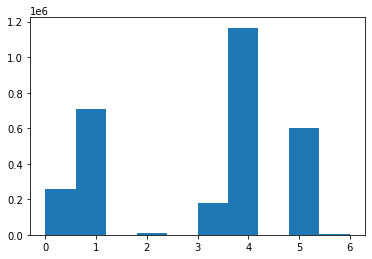

In [ ]:
plt.hist(data['ageRange'])

#### Display plot of AgeRange by User_day_code

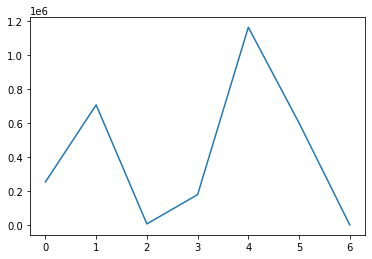

In [ ]:
plt.plot(data.groupby('ageRange')['user_day_code'].count())

**AgeRange:**

0: No se ha podido determinar el rango de edad del usuario

*1: El usuario tiene entre 0 y 16 años*

2: El usuario tiene entre 17 y 18 años

3: El usuario tiene entre 19 y 26 años

*4: El usuario tiene entre 27 y 40 años*

*5: El usuario tiene entre 41 y 65 años*

6: El usuario tiene 66 años o más 


En el Mes de Enero 2018, los usuarios que más utilizando la bici son:

1. El usuario tiene entre 27 y 40 años
2. El usuario tiene entre 17 y 18 años
3. El usuario tiene entre 41 y 65 años

### District Idunplug bike by age

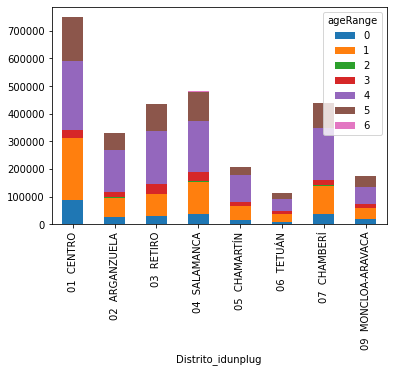

In [ ]:
data.groupby(['Distrito_idunplug', 'ageRange']).size().unstack().plot(kind='bar', stacked=True)

### District Idplug bike by age

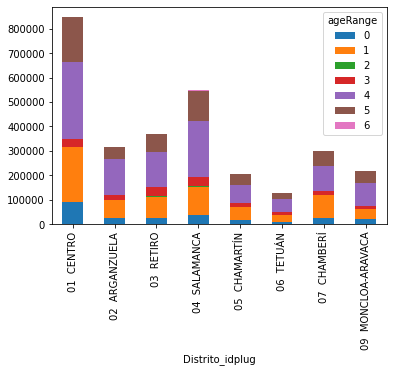

In [ ]:
data.groupby(['Distrito_idplug','ageRange']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

<Figure size 720x360 with 0 Axes>

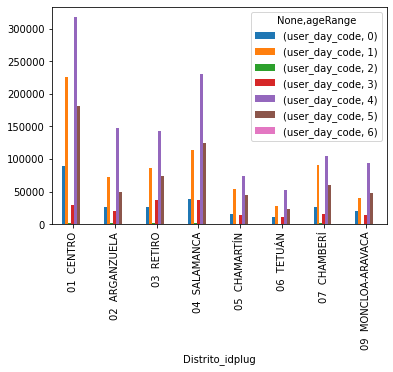

In [ ]:
indpl_age = data.groupby(['Distrito_idplug', 'ageRange']).agg({'user_day_code': 'count'})
fig2 = plt.figure()
fig2.set_figheight(5)
fig2.set_figwidth(10)
indpl_age.unstack().plot.bar()

### District iduplug with district idplug



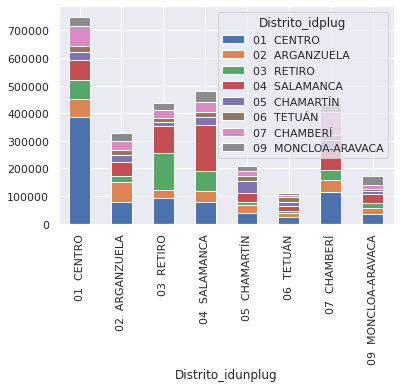

<Figure size 10800x1800 with 0 Axes>

In [ ]:
data.groupby(['Distrito_idunplug', 'Distrito_idplug']).size().unstack().plot(kind='bar', stacked=True)
fig3 = plt.figure()
fig3.set_figheight(25)
fig3.set_figwidth(150)
plt.show()

In [ ]:
dese_eng = pd.DataFrame(data.groupby(['Distrito_idunplug', 'Distrito_idplug']).size())
dese_eng

0
Distrito_idunplug   Distrito_idplug            
01  CENTRO          01  CENTRO           386583
                    02  ARGANZUELA        65985
                    03  RETIRO            67967
                    04  SALAMANCA         71393
                    05  CHAMARTÍN         30474
...                                         ...
09  MONCLOA-ARAVACA 04  SALAMANCA         34915
                    05  CHAMARTÍN         10362
                    06  TETUÁN             7396
                    07  CHAMBERÍ          15167
                    09  MONCLOA-ARAVACA   32407

[64 rows x 1 columns]

###Manipulating data with time variable

In [ ]:
data['travel_minutes'] = data['travel_time'] / 60
data['travel_minutes']

0           4.733333
1          13.733333
2          13.733333
3           5.616667
4           5.616667
             ...    
2926624     5.216667
2926625     3.750000
2926626    11.400000
2926627     2.683333
2926628     2.900000
Name: travel_minutes, Length: 2926629, dtype: float64

In [ ]:
data['travel_minutes'].describe()

count    2.926629e+06
mean     2.963612e+01
std      2.524467e+02
min      1.666667e-02
25%      1.666667e-01
50%      9.933333e+00
75%      3.196667e+01
max      2.752708e+04
Name: travel_minutes, dtype: float64

#### Statistcs of User type by travel minutes.

In [ ]:
data.groupby('user_type')['travel_minutes'].describe()

count       mean         std  ...        50%        75%           max
user_type                                    ...                                    
1           534546.0  15.790231   20.775760  ...  10.750000  16.066667    359.716667
2             6324.0  36.316543   36.901316  ...  22.858333  48.633333    327.383333
3          2385759.0  32.720677  279.328389  ...   6.216667  36.833333  27527.083333

[3 rows x 8 columns]

#### Grouping by possible type of trip

In [ ]:
travel_35 = data[(data['travel_minutes'] >= 15) & (data['travel_minutes'] <= 35)] # Funtional
travel_180 = data[(data['travel_minutes'] >= 35) & (data['travel_minutes'] <= 180)] # Recreative
travel_190 = data[data['travel_minutes'] >=181] # BreakDown

#### Travel Minutes Plotting

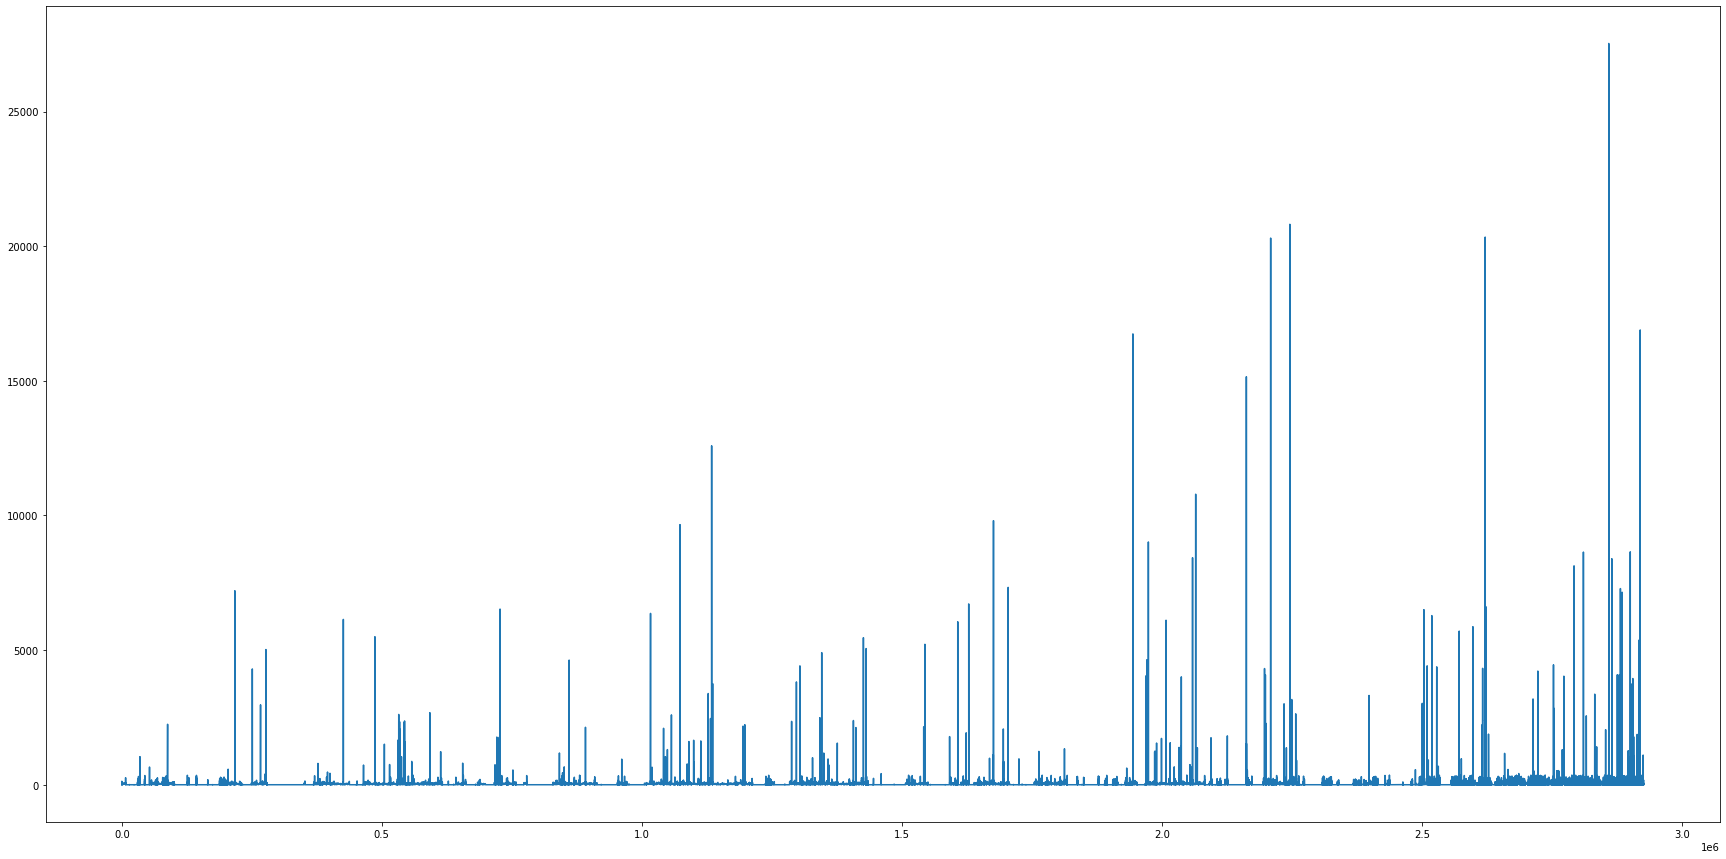

In [ ]:
 data['travel_minutes'].plot(figsize=(30, 15))

### Trip of a specific user

In [ ]:
data['user_day_code'][0]

'b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64644821b72d560b100f'

In [ ]:
data[data['user_day_code'] == 'b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64644821b72d560b100f']

_id  ... travel_minutes
0  5a505acd2f384319304ed614  ...       4.733333

[1 rows x 18 columns]

In [ ]:
data['idunplug_station'].sort_values().count()

2926629

In [ ]:
# aa = jan18[(jan18.idunplug_station == '1') & (jan18.idplug_station == '2')].index() #don't work

#### Display the tweenty user that most use the bike in January 18 month.

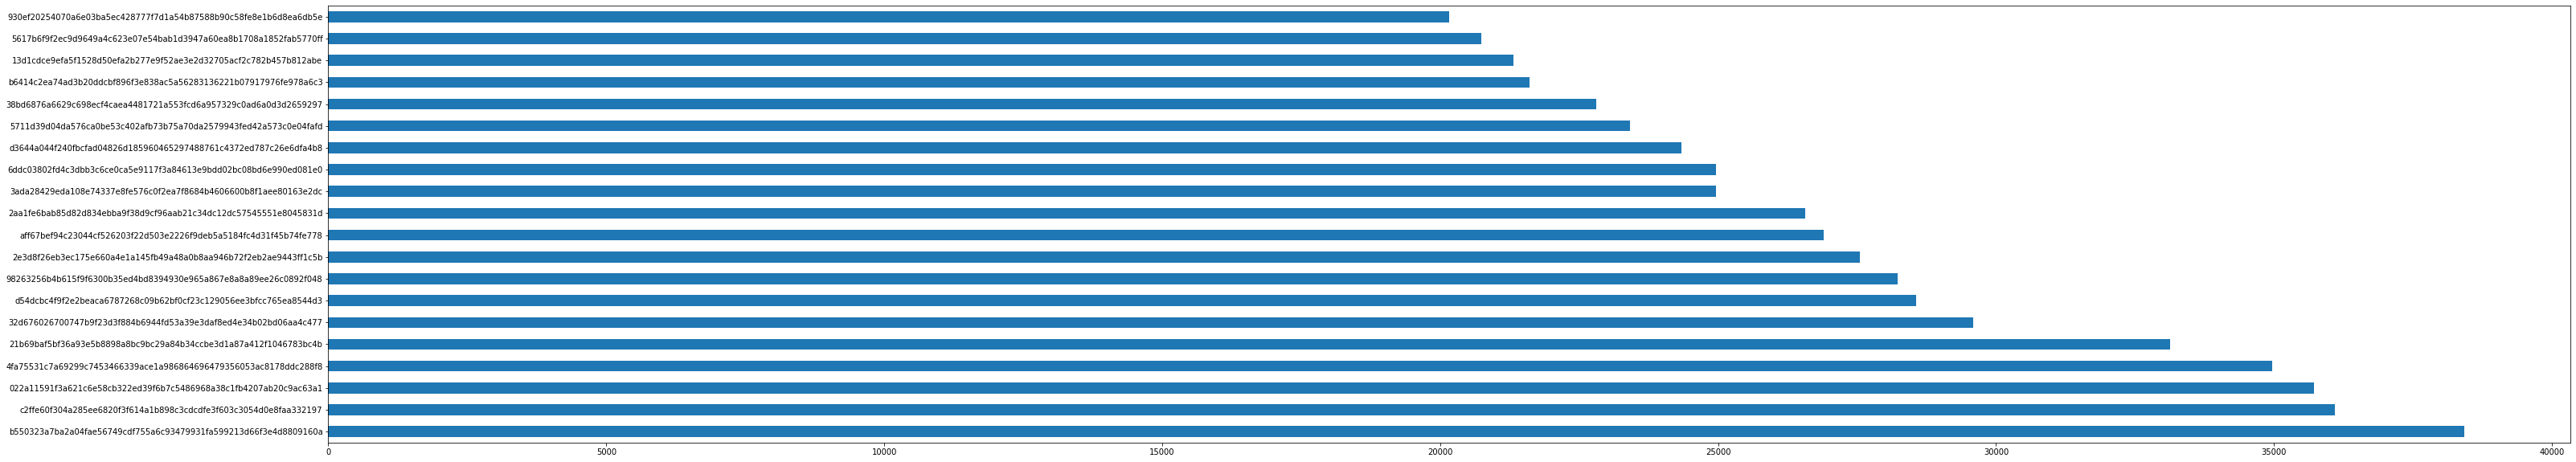

In [ ]:
mostfreque_user = data['user_day_code'].value_counts(sort=True).head(20)

fig = plt.figure(figsize=(50,10))
mostfreque_user.plot.barh()


In [ ]:
data['user_day_code'].value_counts(sort=True).head(1000)

b550323a7ba2a04fae56749cdf755a6c93479931fa599213d66f3e4d8809160a    38416
c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603c3054d0e8faa332197    36100
022a11591f3a621c6e58cb322ed39f6b7c5486968a38c1fb4207ab20c9ac63a1    35721
4fa75531c7a69299c7453466339ace1a986864696479356053ac8178ddc288f8    34969
21b69baf5bf36a93e5b8898a8bc9bc29a84b34ccbe3d1a87a412f1046783bc4b    33124
                                                                    ...  
d390e5837bc67fc2d14a98b1b0279303357a511340cd1069b0dd6bd452b31582       36
188950f83dd09f372f1ffadcb1ec42bb7cff5ace68e71354b626895836e4ffea       36
f37c8f7fd11e73eff653ed7e7a26f999a8e2d42970f454c65a83966cdc27ad35       36
588e96a47efb1e2b782b05ce9a975aaaf28d0dec022ece5e6a313f931c072f2b       36
2a0d780ff05f6f74192688b2ad0ab475c04456aa0e3b270f6bfa0429cc6fe4d0       36
Name: user_day_code, Length: 1000, dtype: int64

In [ ]:
data[data['user_day_code'] == 'c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603c3054d0e8faa332197'] #example one person all his travel

_id  ... travel_minutes
314362  5a569d852f384338109b9644  ...       0.633333
314363  5a569d852f384338109b9644  ...       0.633333
314364  5a569d852f384338109b9644  ...       0.633333
314365  5a569d852f384338109b9644  ...       0.633333
314366  5a569d852f384338109b9644  ...       0.633333
...                          ...  ...            ...
350457  5a569d872f384338109b97a9  ...       0.166667
350458  5a569d872f384338109b97a9  ...       0.166667
350459  5a569d872f384338109b97a9  ...       0.166667
350460  5a569d872f384338109b97a9  ...       0.166667
350461  5a569d872f384338109b97a9  ...       0.166667

[36100 rows x 18 columns]

In [ ]:
station = pd.DataFrame(data['idunplug_station'], data['idplug_station']) #create a new dataframe

In [ ]:
data['idunplug_station'].value_counts

<bound method IndexOpsMixin.value_counts of 0            6
1            6
2            6
3          104
4          104
          ... 
2926624     29
2926625     29
2926626     29
2926627     29
2926628     29
Name: idunplug_station, Length: 2926629, dtype: int64>

In [ ]:
data['idunplug_station'].value_counts() # count values of idunplug_station 

128    67652
129    66468
135    66081
132    56105
43     51662
       ...  
173     6358
123     6164
5       5981
124     5838
29      3138
Name: idunplug_station, Length: 166, dtype: int64

In [ ]:
data['idunplug_station'].value_counts(normalize=True, sort=True) #relative frequence

128    0.023116
129    0.022711
135    0.022579
132    0.019171
43     0.017652
         ...   
173    0.002172
123    0.002106
5      0.002044
124    0.001995
29     0.001072
Name: idunplug_station, Length: 166, dtype: float64

In [ ]:
# Know the set in idunplug_station 
# set(jan18['idunplug_station'])

### Rank for user day variable

In [ ]:
user_rank = data['user_day_code'].value_counts()
user_rank

b550323a7ba2a04fae56749cdf755a6c93479931fa599213d66f3e4d8809160a    38416
c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603c3054d0e8faa332197    36100
022a11591f3a621c6e58cb322ed39f6b7c5486968a38c1fb4207ab20c9ac63a1    35721
4fa75531c7a69299c7453466339ace1a986864696479356053ac8178ddc288f8    34969
21b69baf5bf36a93e5b8898a8bc9bc29a84b34ccbe3d1a87a412f1046783bc4b    33124
                                                                    ...  
e8735e88876cb4839b16b7e853688f0d51c21aaa094b7f4ad84e43f924d09d98        1
8012d5b35afea30206b9a641d0e65b915feda2b8930bcc5dad9ac35d32619b7c        1
e58815eb751ff5a682a9d59c4be1b972e2343b2d61cc7c14a0fd182ab5650a64        1
f40bc4d583d675fd2162f2c9e61f2d4db1a4ebdc58b3094dc32938ad11e485fb        1
bce4579d8f79e4d22404d3aed1d27192000560542c0c8e7cc2f0ab00c7442797        1
Name: user_day_code, Length: 140719, dtype: int64

In [ ]:
# Function per userday 
def userday(x):
  return data[data['user_day_code'] == x][['idunplug_station', 'idplug_station',
       'user_type','travel_time','unplug_hourTime', 'ageRange']]

In [ ]:
userday('c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603c3054d0e8faa332197')

idunplug_station  ...  ageRange
314362                82  ...         1
314363                82  ...         1
314364                82  ...         1
314365                82  ...         1
314366                82  ...         1
...                  ...  ...       ...
350457                88  ...         1
350458                88  ...         1
350459                88  ...         1
350460                88  ...         1
350461                88  ...         1

[36100 rows x 6 columns]

In [ ]:
data.loc[data['user_day_code'] == 'c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603c3054d0e8faa332197']

_id  ... travel_minutes
314362  5a569d852f384338109b9644  ...       0.633333
314363  5a569d852f384338109b9644  ...       0.633333
314364  5a569d852f384338109b9644  ...       0.633333
314365  5a569d852f384338109b9644  ...       0.633333
314366  5a569d852f384338109b9644  ...       0.633333
...                          ...  ...            ...
350457  5a569d872f384338109b97a9  ...       0.166667
350458  5a569d872f384338109b97a9  ...       0.166667
350459  5a569d872f384338109b97a9  ...       0.166667
350460  5a569d872f384338109b97a9  ...       0.166667
350461  5a569d872f384338109b97a9  ...       0.166667

[36100 rows x 18 columns]

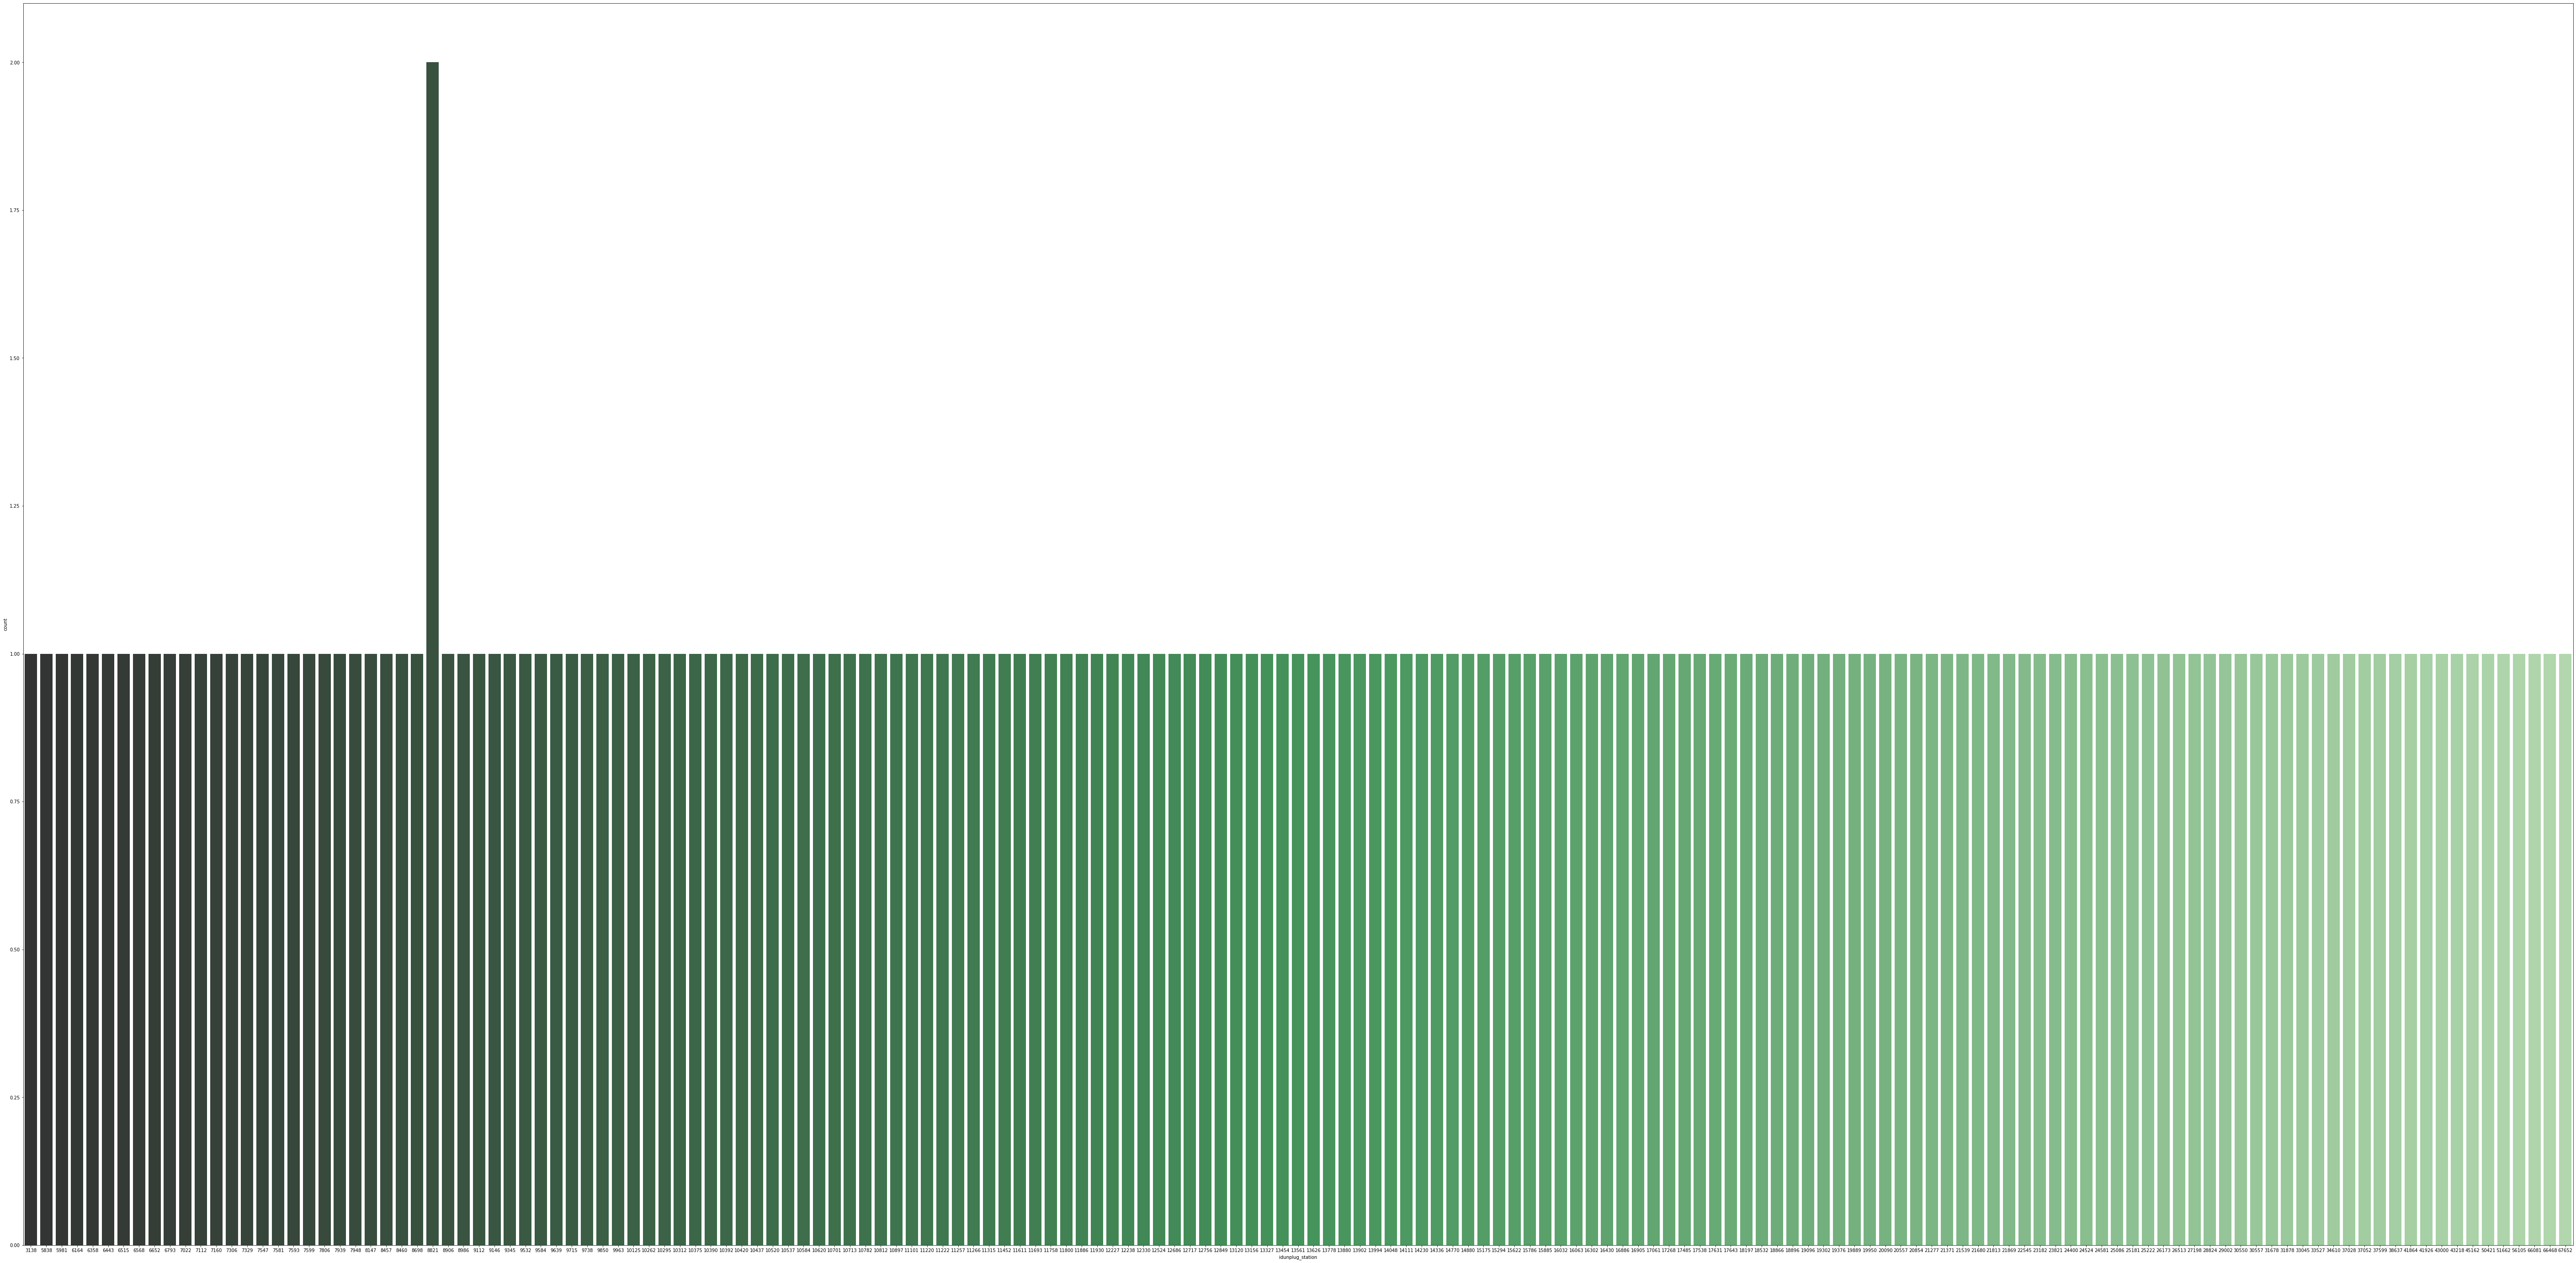

In [ ]:
fig = plt.figure(figsize=(100,50))
sns.countplot(x=data["idunplug_station"].value_counts(sort=True), data=data, hue_order=True, palette="Greens_d")


#### The most used stations for users

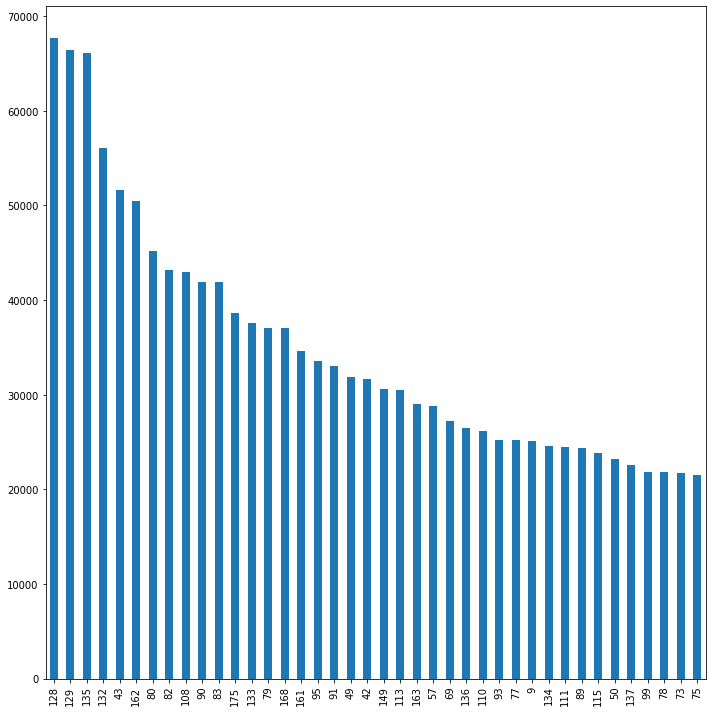

In [ ]:
# values_num_station = jan18["idunplug_station"].value_counts(sort=True).head(100)
most_stations = data["idunplug_station"].value_counts(sort=True).head(40)
fig = plt.figure(figsize=(10,10))
most_stations.plot(kind='bar')
plt.tight_layout()

In [ ]:
data["idunplug_station"].value_counts(sort=True)

128    67652
129    66468
135    66081
132    56105
43     51662
       ...  
173     6358
123     6164
5       5981
124     5838
29      3138
Name: idunplug_station, Length: 166, dtype: int64

In [ ]:
# fig, ax = plt.hist()
# y = jan18["idunplug_station"].value_counts(sort=True).head(3)
# x = ["129", "43", "57"]
# n = ax.hist(x, density=1)
# ax.hist(x, y)
# ax.set_xlabel('number station')
# ax.set_ylabel('frequence')
# ax.set_title(r'Testing')
# # Tweak spacing to prevent clipping of ylabel
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(50,50))
# sns.countplot(x=jan18["idunplug_station"].value_counts(sort=True).head(5), data=jan18, palette="Greens_d")

In [ ]:
# aa=jan18[['idunplug_base']].rank()
# plt.hist(aa, bins = 8)

(array([1., 0., 0., 0., 0., 0., 0., 2., 3., 4., 3., 3., 4., 3., 2., 5., 3.,
        5., 3., 8., 8., 4., 5., 5., 3., 3., 2., 4., 3., 5., 2., 2., 2., 1.,
        3., 2., 1., 3., 2., 3., 1., 1., 2., 2., 1., 3., 0., 1., 1., 3., 3.,
        0., 1., 0., 1., 0., 1., 1., 2., 3., 0., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 2., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 1.]),
 array([ 3138.        ,  3506.65142857,  3875.30285714,  4243.95428571,
         4612.60571429,  4981.25714286,  5349.90857143,  5718.56      ,
         6087.21142857,  6455.86285714,  6824.51428571,  7193.1657

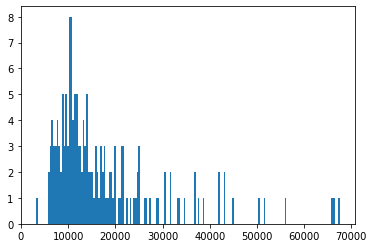

In [ ]:
plt.hist(data['idunplug_station'].value_counts(), bins=175)

In [ ]:
# cuelgan = jan18[   (jan18.idplug_station == 85)
#                   |(jan18.idplug_station == 74)
#                   |(jan18.idplug_station == 69)
#                   |(jan18.idplug_station == 65)
#                   |(jan18.idplug_station == 60)
#                   |(jan18.idplug_station == 79)
#                   |(jan18.idplug_station == 77)
#                   |(jan18.idplug_station == 76)
#                   |(jan18.idplug_station == 71)
#                   |(jan18.idplug_station == 68)
#                   |(jan18.idplug_station == 63)]

# #Gráfico
# import seaborn as sns
# import matplotlib.pyplot as plt
# graph = cuelgan['idunplug_station'].value_counts(normalize=True, sort=True)
# plt.figure(figsize=(50,10))
# sns.barplot(graph.index, graph.values, alpha=1)
# plt.xlabel('Estaciones donde van', fontsize=12)
# plt.ylabel('% de frecuencia', fontsize=12)
# plt.show()

# # Numero de usurios que llegan por estación, ordenado de mayor a menor
# cuelgan['idplug_station'].value_counts(sort=True).head()

### Type of user

* 0: Could not determine user type
* 1: Annual user (holder of an annual pass)
* 2: Occasional user
* 3: Company worker




In [ ]:
data['user_type'].value_counts()

3    2385759
1     534546
2       6324
Name: user_type, dtype: int64

In [ ]:
data['user_type'].describe()

count    2.926629e+06
mean     2.632541e+00
std      7.731308e-01
min      1.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: user_type, dtype: float64

### Zip Code

In [ ]:
## ZIP CODE 

# jan18['zip_code'].replace('^(?!^(?:0[1-9]|[1-4]\d|5[0-2])\d{3}$).*', np.nan, regex=True, inplace=True) #transform empty data
# len(jan18[-jan18['zip_code'].duplicated(keep=False)]) #count the data
# jan18['zip_code'].value_counts()
# # User by postal code withouth clean
# jan18.groupby(['zip_code'])['id'].count()

# # Function to clean of postal code 1/3
# def make_int(s):
#     s = s.strip()
#     return int(s) if (s and s.isdigit()) else 0

#     # Function to clean of postal code 2/3
# jan18['zip_code_as_int'] = jan18['zip_code'].apply(lambda x: make_int(x))

# # Function to clean of postal code 3/3
# zip_id = jan18.groupby(['zip_code_as_int'])['id'].count()

In [ ]:
# plt.scatter(top_idunp, top_idp)

### Correlation of idunplug base, idunplug station, idplug base, idplug station, user type and travel time

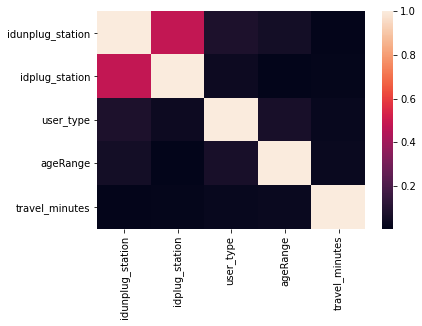

In [ ]:
sns.heatmap(data.loc[:, ['idunplug_station', 'idplug_station', 'user_type', 'ageRange', 'travel_minutes']].corr(), linewidths=0.0001)

In [ ]:
data.corr()

idunplug_station  ...  travel_minutes
idunplug_station           1.000000  ...        0.012698
Longitud_idunplug          0.004877  ...       -0.003298
Latitud_idunplug           0.293414  ...        0.000549
idplug_station             0.481429  ...        0.015928
Longitud_idplug            0.045166  ...        0.005282
Latitud_idplug             0.124169  ...        0.006221
user_type                  0.082160  ...        0.025841
travel_time                0.012698  ...        1.000000
ageRange                   0.057669  ...        0.029984
travel_minutes             0.012698  ...        1.000000

[10 rows x 10 columns]

In [ ]:
# sns.pairplot(jan18, x_vars=user_day_code, y_vars=idplugbase)

In [ ]:
%%time
# plt.scatter(userdaycode, idplugbase)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


CPU times: user 2min 39s, sys: 2.07 s, total: 2min 42s
Wall time: 2min 41s


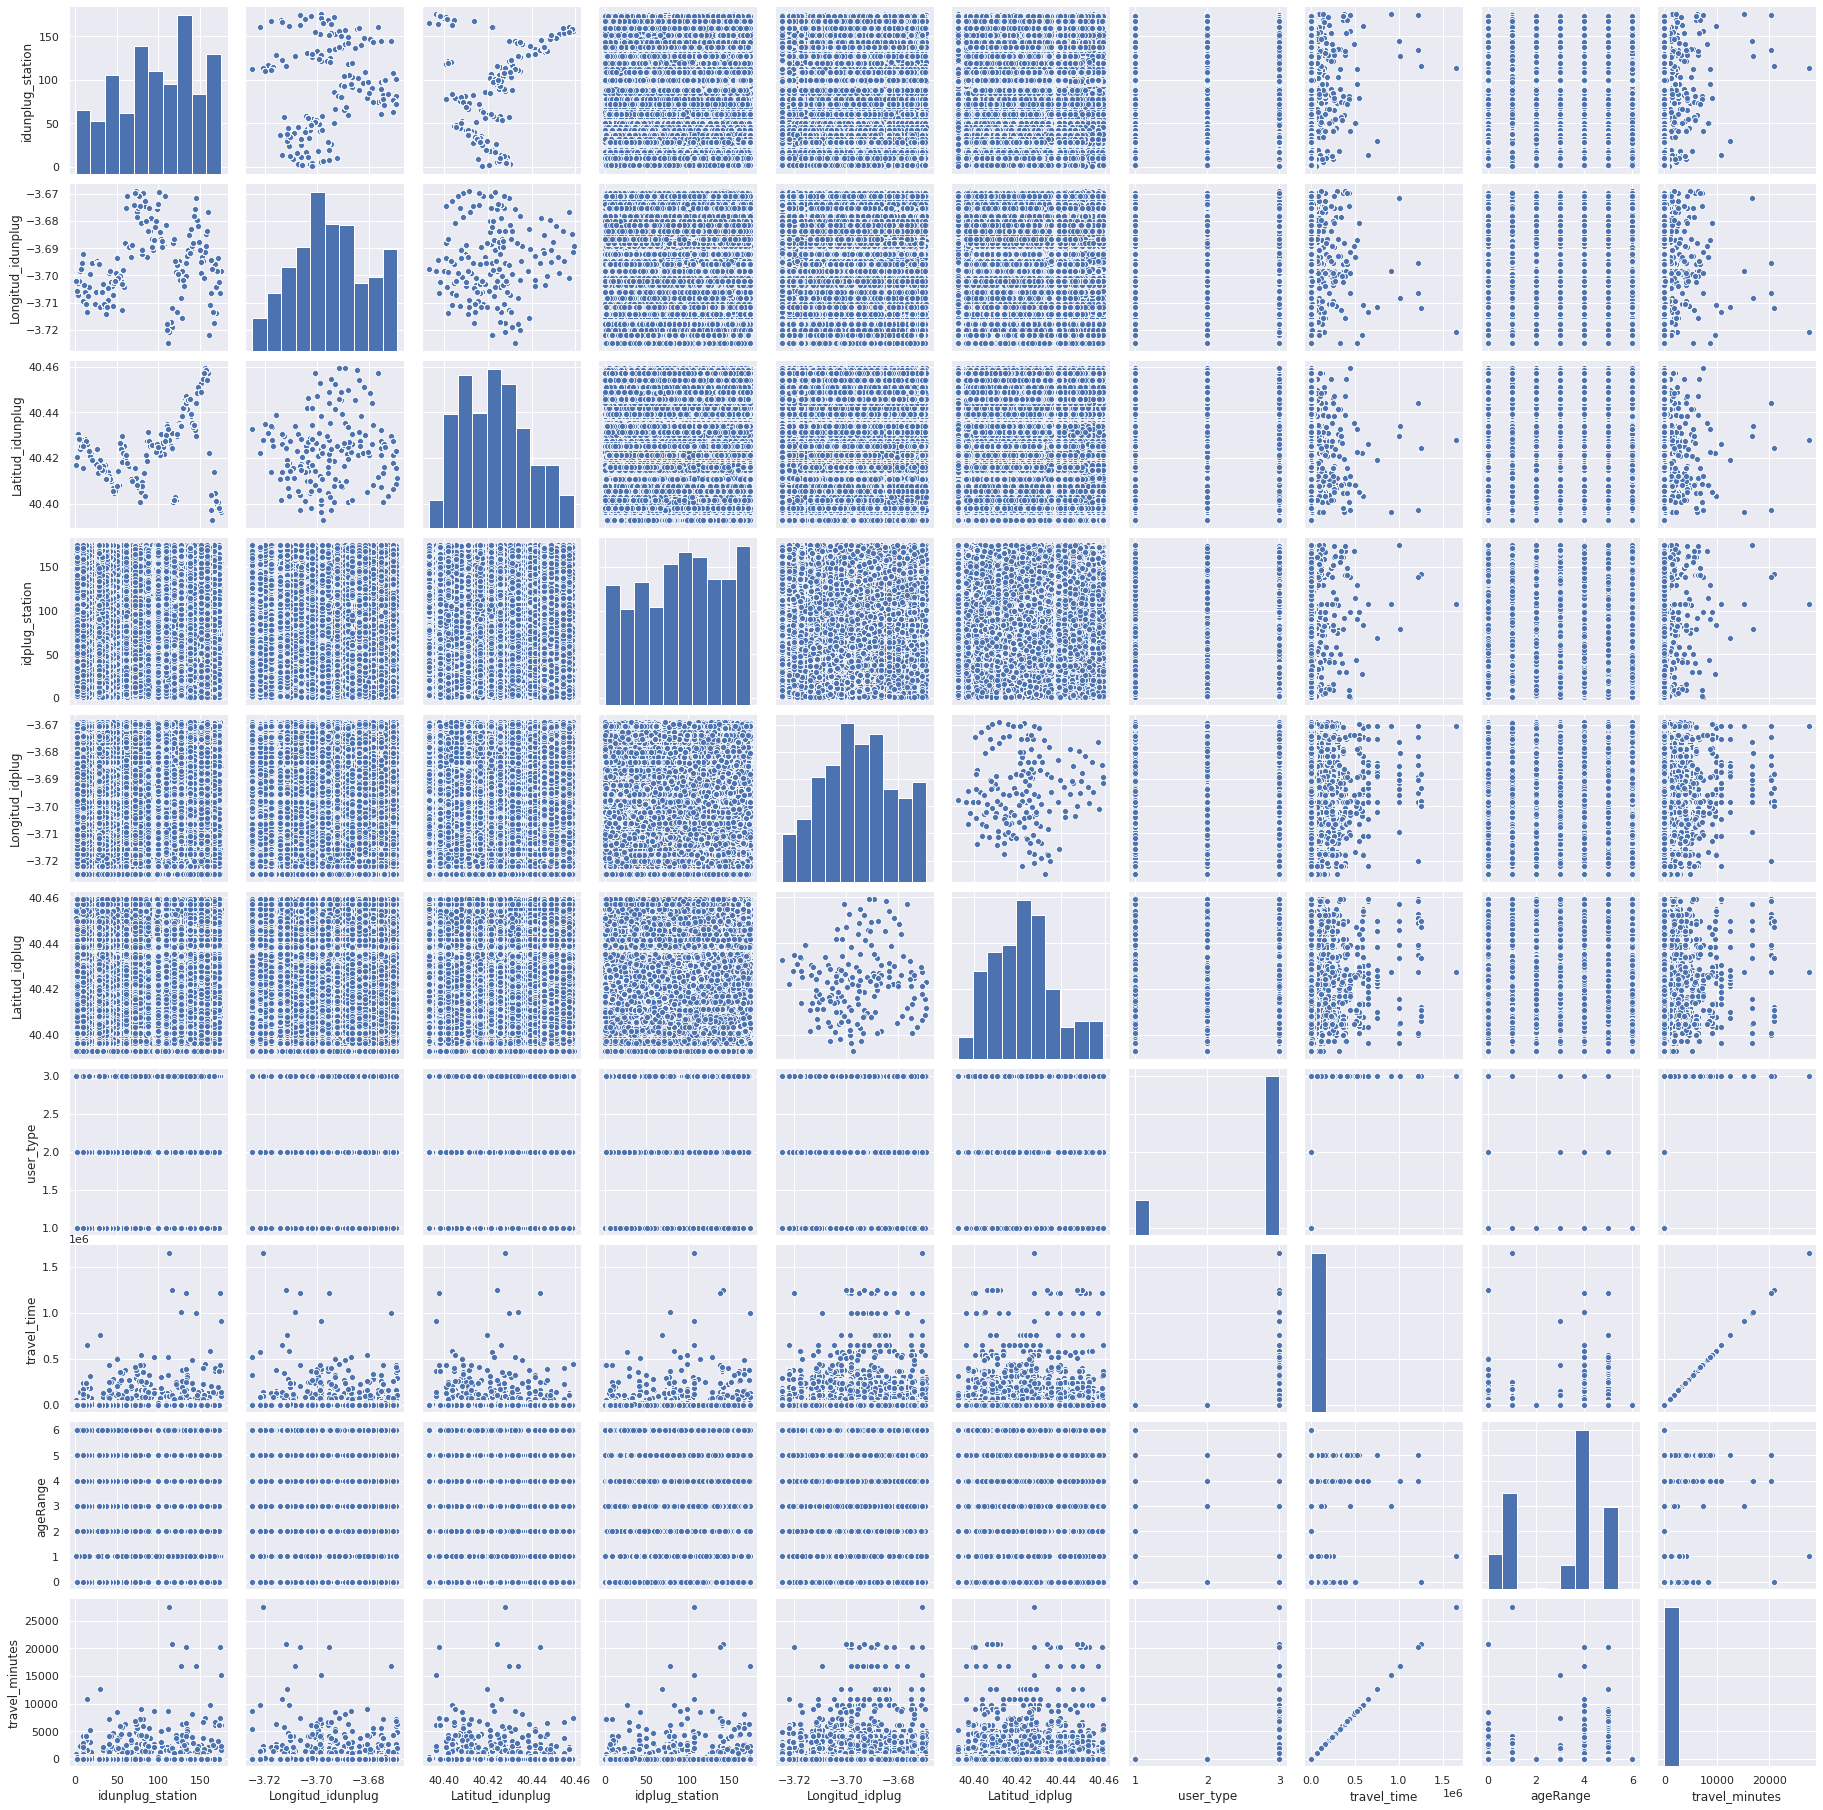

In [ ]:
%%time
sns.set()
sns.pairplot(data)

### Distance Calculate using Haversine

In [ ]:
#Calculate KMs 
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(data):
  lon1 = data['Longitud_idunplug']
  lat1 = data['Latitud_idunplug']
  lon2 = data['Longitud_idplug']
  lat2 = data['Latitud_idplug']
  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2]) #change a radians
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
  c = 2 * arcsin(sqrt(a))
  km = 6367 * c # Tierra es una esfera perfecta de radio RT = 6367
  return km 
# data['distance'] = data.apply(lambda data: haversine(data), axis=1

In [ ]:
data['distance'] = data.apply(lambda data: haversine(data), axis=1)

(array([574439., 477863., 505249., 518795., 378883., 250042., 122359.,
         64108.,  25885.,   9006.]),
 array([0.        , 0.74116649, 1.48233297, 2.22349946, 2.96466595,
        3.70583244, 4.44699892, 5.18816541, 5.9293319 , 6.67049838,
        7.41166487]),
 <a list of 10 Patch objects>)

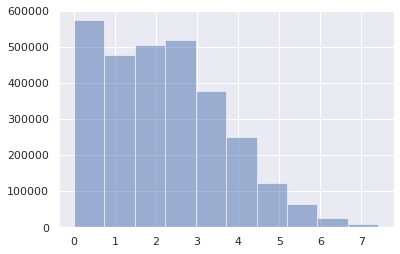

In [ ]:
plt.hist(data.distance, alpha =0.5)

### Slope Calculate 


In [ ]:
lon1 = data['Longitud_idunplug']
lat1 = data['Latitud_idunplug']
lon2 = data['Longitud_idplug']
lat2 = data['Latitud_idplug']
m = ""
slope = ""

if slope == 0:
  m = 0
else: 
  lat_dif = lat2-lat1
  lon_dif = lon2-lon1
  m = (lat_dif/lon_dif) * 100
data['slope'] = m

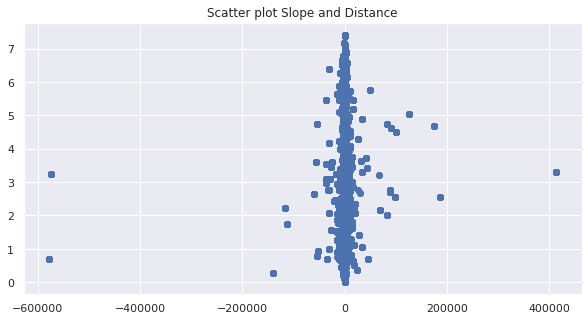

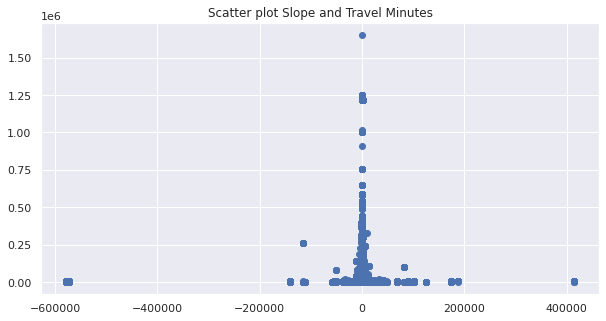

In [ ]:
fig1 = plt.figure(1)
fig1.set_figheight(5)
fig1.set_figwidth(10)
plt.title("Scatter plot Slope and Distance")
plt.scatter(data['slope'], data['distance'])
fig2 = plt.figure(2)
fig2.set_figheight(5)
fig2.set_figwidth(10)
plt.title("Scatter plot Slope and Travel Minutes")
plt.scatter(data['slope'], data['travel_time'])
plt.show()

### Deleting Nan

In [ ]:
data.isnull().sum()

_id                       0
user_day_code             0
idunplug_station          0
Distrito_idunplug         0
Barrio_idunplug           0
Longitud_idunplug         0
Latitud_idunplug          0
idplug_station            0
Distrito_idplug           0
Barrio_idplug             0
Longitud_idplug           0
Latitud_idplug            0
user_type                 0
travel_time               0
unplug_hourTime           0
ageRange                  0
zip_code                  0
travel_minutes            0
distance                  0
slope                256755
dtype: int64

In [ ]:
data = data.dropna()

### Slope Analysis

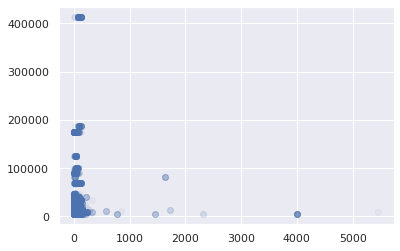

In [ ]:
hight_slope = data[data['slope'] >= 4139.666066302884]
plt.scatter(hight_slope['travel_minutes'], hight_slope['slope'], alpha=0.0555)

In [ ]:
hight_slope.groupby('user_type').count()#hight_slope(subida, es decir pendiente)

_id  user_day_code  ...  distance  slope
user_type                        ...                 
1           3885           3885  ...      3885   3885
2             34             34  ...        34     34
3          21652          21652  ...     21652  21652

[3 rows x 19 columns]

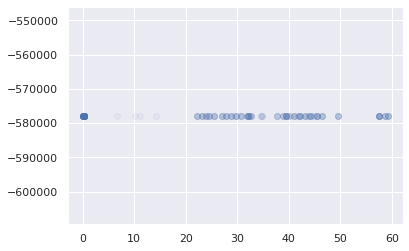

In [ ]:
low_slope = data[data['slope'] == -577795.0712825452]
plt.scatter(low_slope['travel_minutes'], low_slope['slope'], alpha=0.0555)

In [ ]:
low_slope.groupby('user_type').count()

_id  user_day_code  ...  distance  slope
user_type                      ...                 
1            5              5  ...         5      5
3          329            329  ...       329    329

[2 rows x 19 columns]

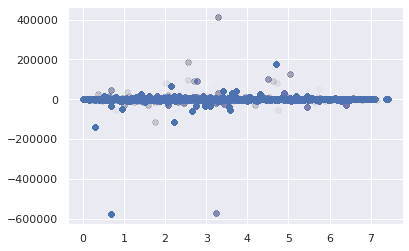

In [ ]:

plt.scatter(data['distance'],data['slope'], alpha=0.0055)

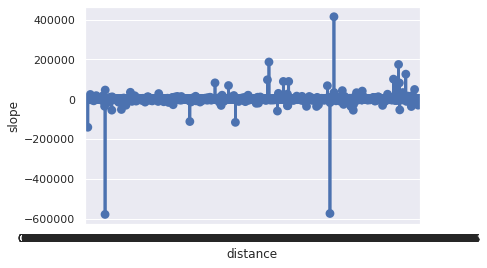

In [ ]:
import seaborn as sns
sns.pointplot(x="distance", y="slope",data=data)

### Broke or not

In [ ]:
broke_dict = {3:1, 2:0, 1:0}
data['broke'] = data.user_type.map(broke_dict)

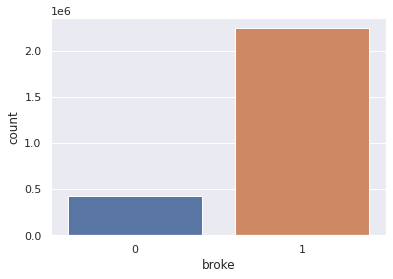

In [ ]:
jan18_broke = sns.countplot(x='broke', data=data)

### Travel per user_day_code

In [ ]:
data_user = data.groupby('user_day_code').count()
data_user.describe()

id_x_x  idunplug_station  ...     ageRange_x     zip_code_x
count  140719.000000     140719.000000  ...  140719.000000  140719.000000
mean       20.797682         20.797682  ...      20.797682      20.797682
std       454.710082        454.710082  ...     454.710082     454.710082
min         1.000000          1.000000  ...       1.000000       1.000000
25%         1.000000          1.000000  ...       1.000000       1.000000
50%         1.000000          1.000000  ...       1.000000       1.000000
75%         4.000000          4.000000  ...       4.000000       4.000000
max     38416.000000      38416.000000  ...   38416.000000   38416.000000

[8 rows x 16 columns]

In [ ]:

data['count_travel'] = 0
data_user_groupby_count = data[['user_day_code', 'count_travel']].groupby('user_day_code').count()
data_user_groupby_count= data_user_groupby_count.reset_index()
# data_user_groupby_count
data = pd.merge(data, data_user_groupby_count, on="user_day_code", how="left", indicator=True)
data.head(8)

_id  ... _merge
0  5a505acd2f384319304ed614  ...   both
1  5a505ad02f384319304ed925  ...   both
2  5a505ad02f384319304ed925  ...   both
3  5a505adb2f384319304ee2dd  ...   both
4  5a505adb2f384319304ee2dd  ...   both
5  5a505ad02f384319304ed926  ...   both
6  5a505ad12f384319304eda0f  ...   both
7  5a505ad12f384319304eda3f  ...   both

[8 rows x 20 columns]

In [ ]:
# data = data.rename(columns={"count_travel_y":"count_travel"})
# data = data.drop(['count_travel_x'], axis=1)
data.head()

_id  ... _merge
0  5a505acd2f384319304ed614  ...   both
1  5a505ad02f384319304ed925  ...   both
2  5a505ad02f384319304ed925  ...   both
3  5a505adb2f384319304ee2dd  ...   both
4  5a505adb2f384319304ee2dd  ...   both

[5 rows x 19 columns]

## Correlation of data

In [ ]:
data.corr()

idunplug_station  ...  travel_minutes
idunplug_station           1.000000  ...        0.012698
Longitud_idunplug          0.004877  ...       -0.003298
Latitud_idunplug           0.293414  ...        0.000549
idplug_station             0.481429  ...        0.015928
Longitud_idplug            0.045166  ...        0.005282
Latitud_idplug             0.124169  ...        0.006221
user_type                  0.082160  ...        0.025841
travel_time                0.012698  ...        1.000000
ageRange                   0.057669  ...        0.029984
count_travel              -0.049965  ...       -0.056952
distance                   0.277093  ...        0.027175
slope                     -0.003915  ...        0.001176
broke                      0.082808  ...        0.025662
travel_minutes             0.012698  ...        1.000000

[14 rows x 14 columns]

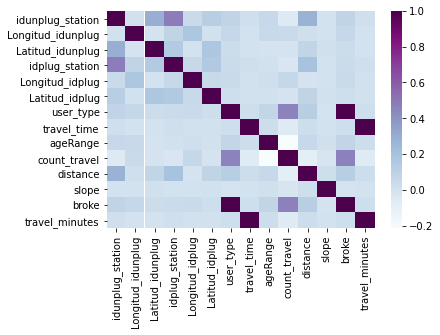

In [ ]:
sns.heatmap(data.corr(), cmap="BuPu", linewidths=0.0001)

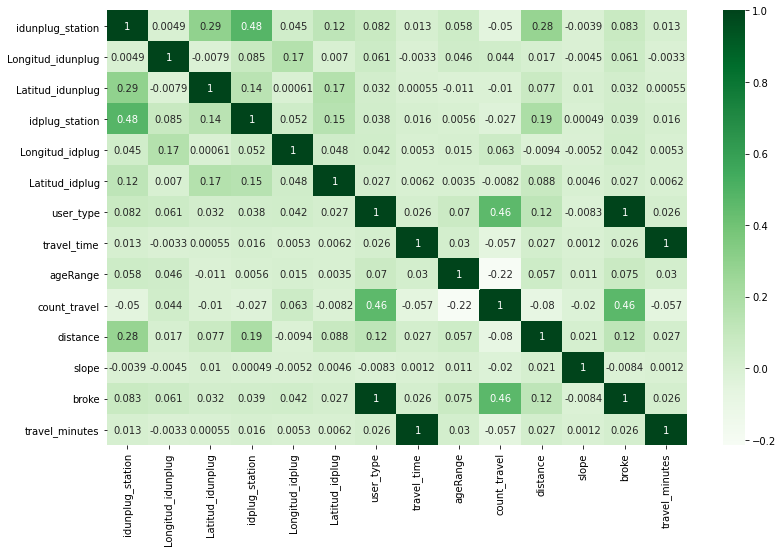

In [ ]:
plt.figure(figsize=(13, 8))
sns.heatmap(data.corr(), annot=True, cmap="Greens")

Hay correlación entre desenganche de la bicicleta con la variable enganche de 0.48. 

El tipo de usuario tiene correlación el total de viaje de 0.46. 

El rompense una bici tiene relación el total de vaije de 0.46.

In [ ]:
vbles = data.loc[:,['user_type', 'count_travel','travel_time', 'distance', 'slope', 'ageRange', 'zip_code']]
vbles.corr()

user_type  count_travel  ...     slope  ageRange
user_type      1.000000      0.463093  ... -0.008348  0.070298
count_travel   0.463093      1.000000  ... -0.019872 -0.215214
travel_time    0.025841     -0.056952  ...  0.001176  0.029984
distance       0.122513     -0.080416  ...  0.021183  0.057408
slope         -0.008348     -0.019872  ...  1.000000  0.010730
ageRange       0.070298     -0.215214  ...  0.010730  1.000000

[6 rows x 6 columns]

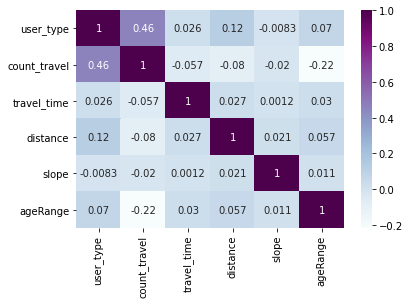

In [ ]:
sns.heatmap(vbles.corr(), cmap = "BuPu", annot= True, linewidths=0.0001)

In [ ]:
# sns.pairplot(jan18, x_vars=user_day_code, y_vars=idplugbase)

In [ ]:
%%time
# plt.scatter(userdaycode, idplugbase)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


CPU times: user 3min 29s, sys: 2.67 s, total: 3min 32s
Wall time: 3min 32s


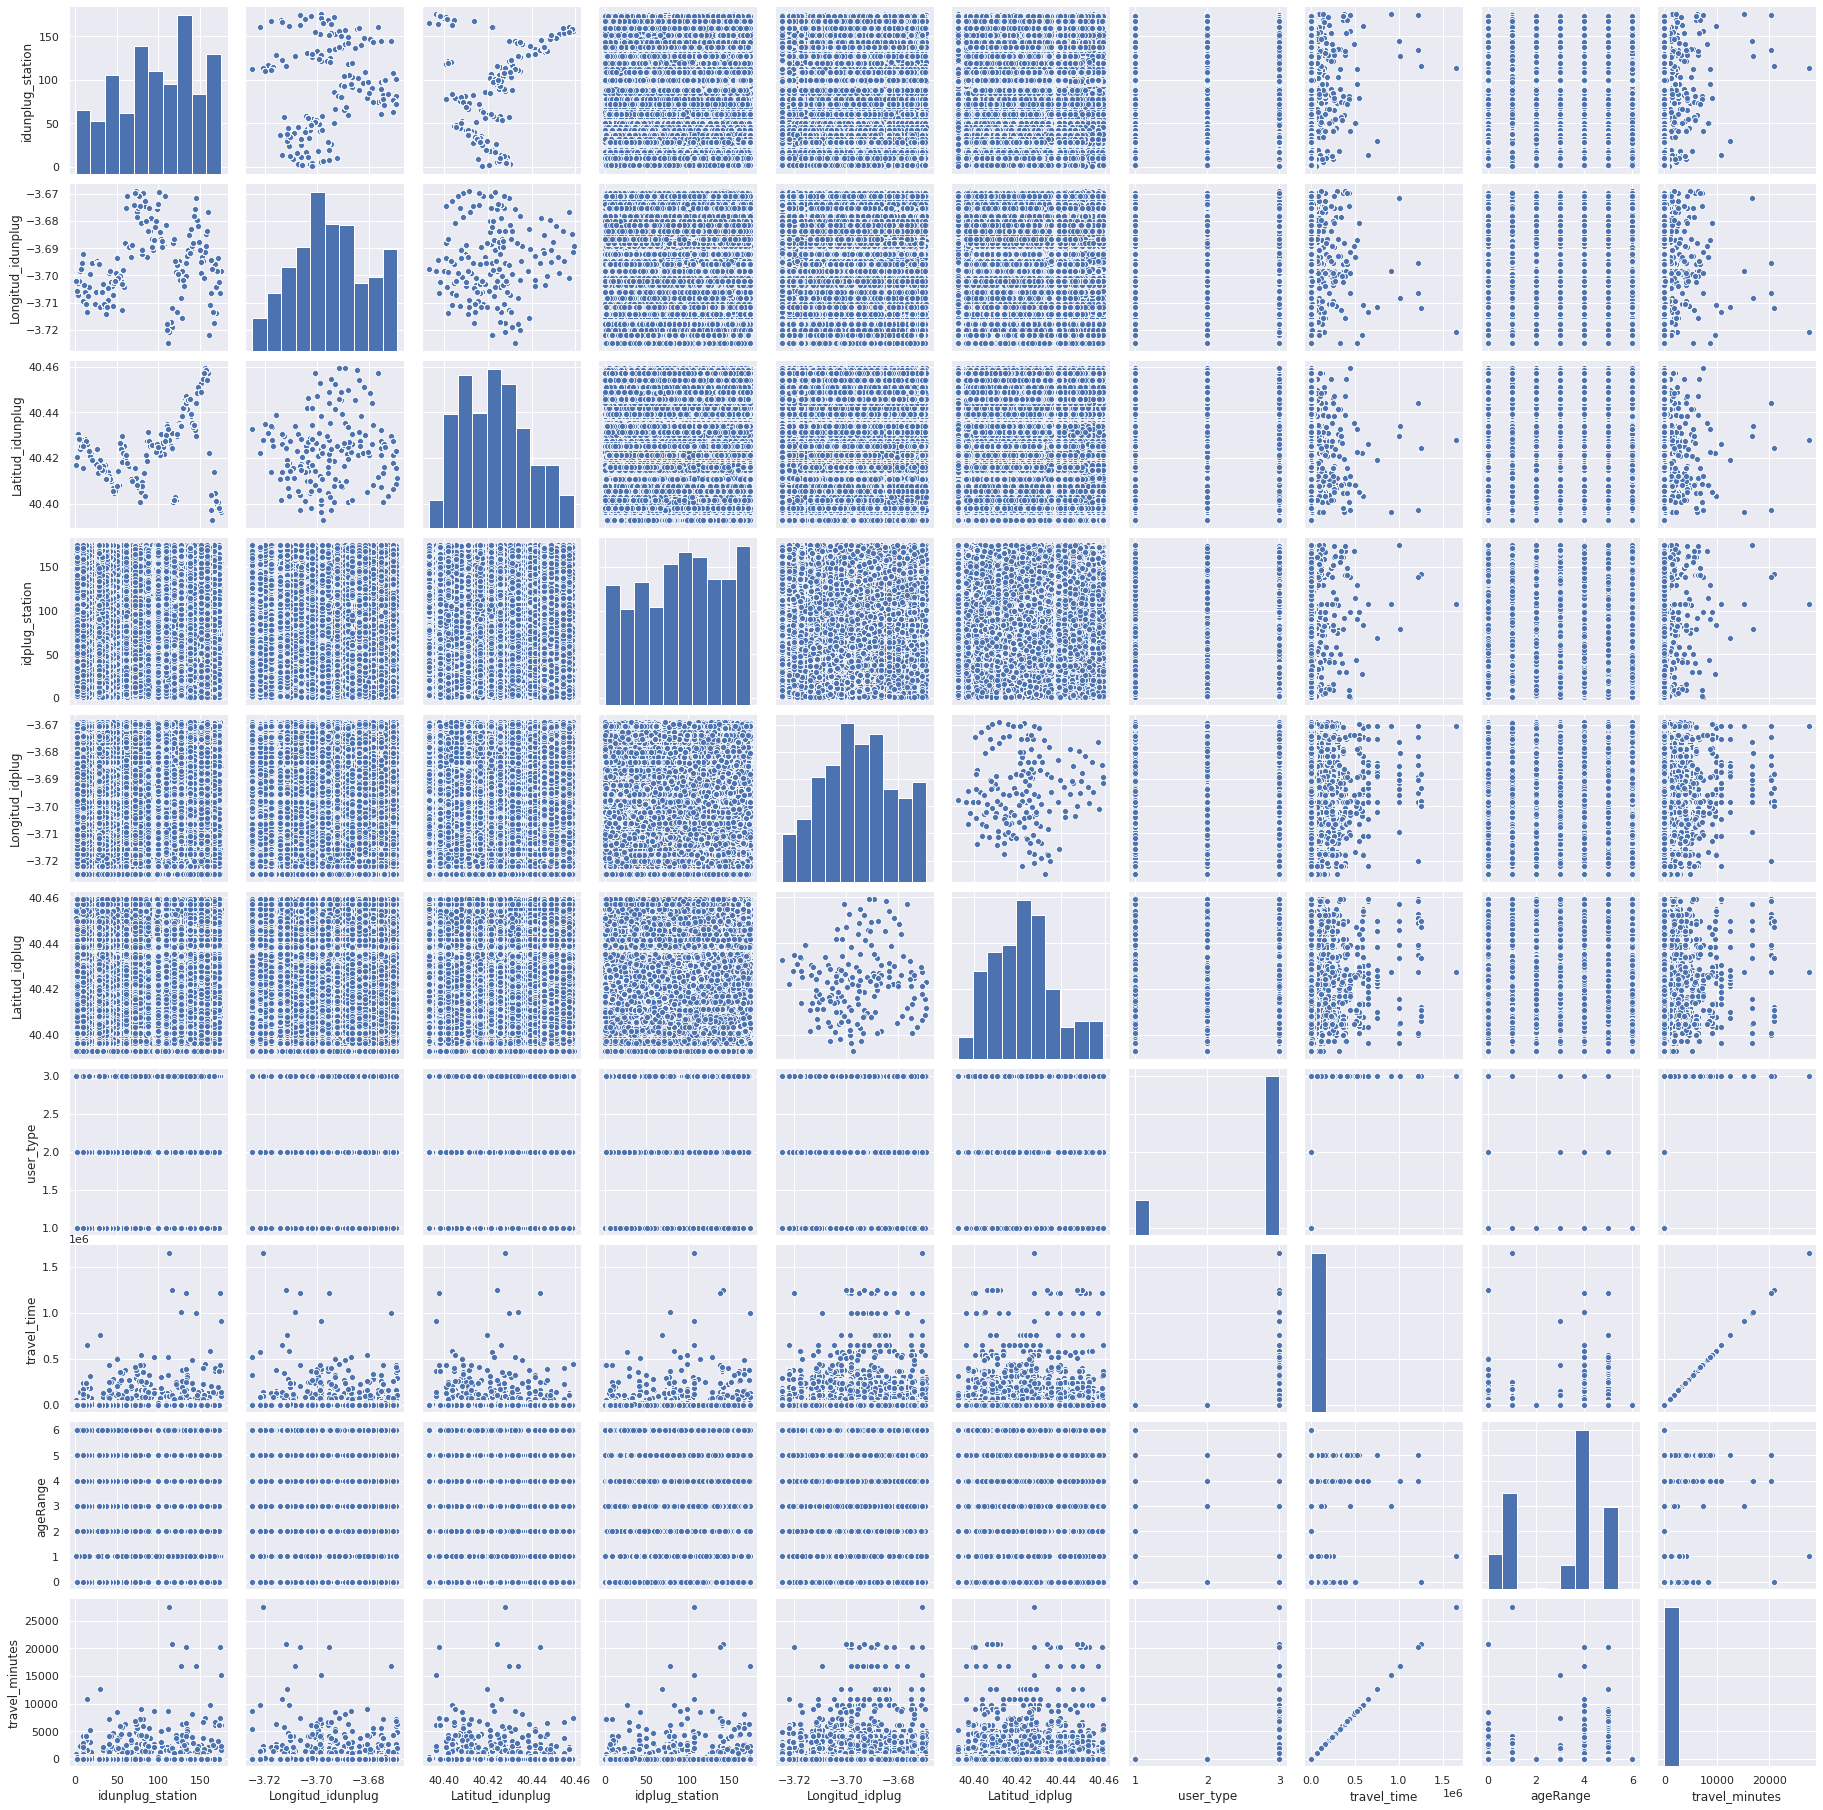

In [ ]:
%%time
sns.set()
sns.pairplot(data)

## Exploration correlation between travel minutes, distance, slope and broke

In [ ]:
vble = data.iloc[:,17:21]
vble.head()

In [ ]:
vble.corr()

In [ ]:
sns.heatmap(vble.corr(), cmap = "BuPu", linewidths=0.0001)

In [ ]:
%%time
sns.set()
sns.pairplot(vble)

In [ ]:
vble2 = data.loc[:,['idunplug_station', 'idplug_station', 'user_type', 'travel_minutes','distance', 'slope']]
vble2.corr()

idunplug_station  idplug_station  ...  distance     slope
idunplug_station          1.000000        0.481429  ...  0.277093 -0.003915
idplug_station            0.481429        1.000000  ...  0.194304  0.000495
user_type                 0.082160        0.038119  ...  0.122513 -0.008348
travel_minutes            0.012698        0.015928  ...  0.027175  0.001176
distance                  0.277093        0.194304  ...  1.000000  0.021183
slope                    -0.003915        0.000495  ...  0.021183  1.000000

[6 rows x 6 columns]

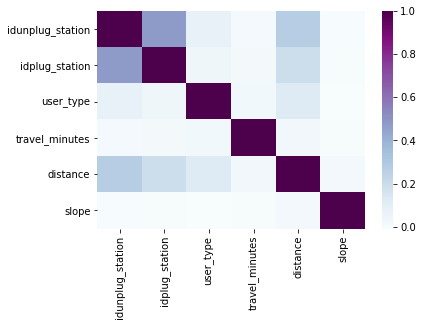

In [ ]:
sns.heatmap(vble2.corr(), cmap = "BuPu", linewidths=0.0001)

CPU times: user 37.5 s, sys: 717 ms, total: 38.2 s
Wall time: 38 s


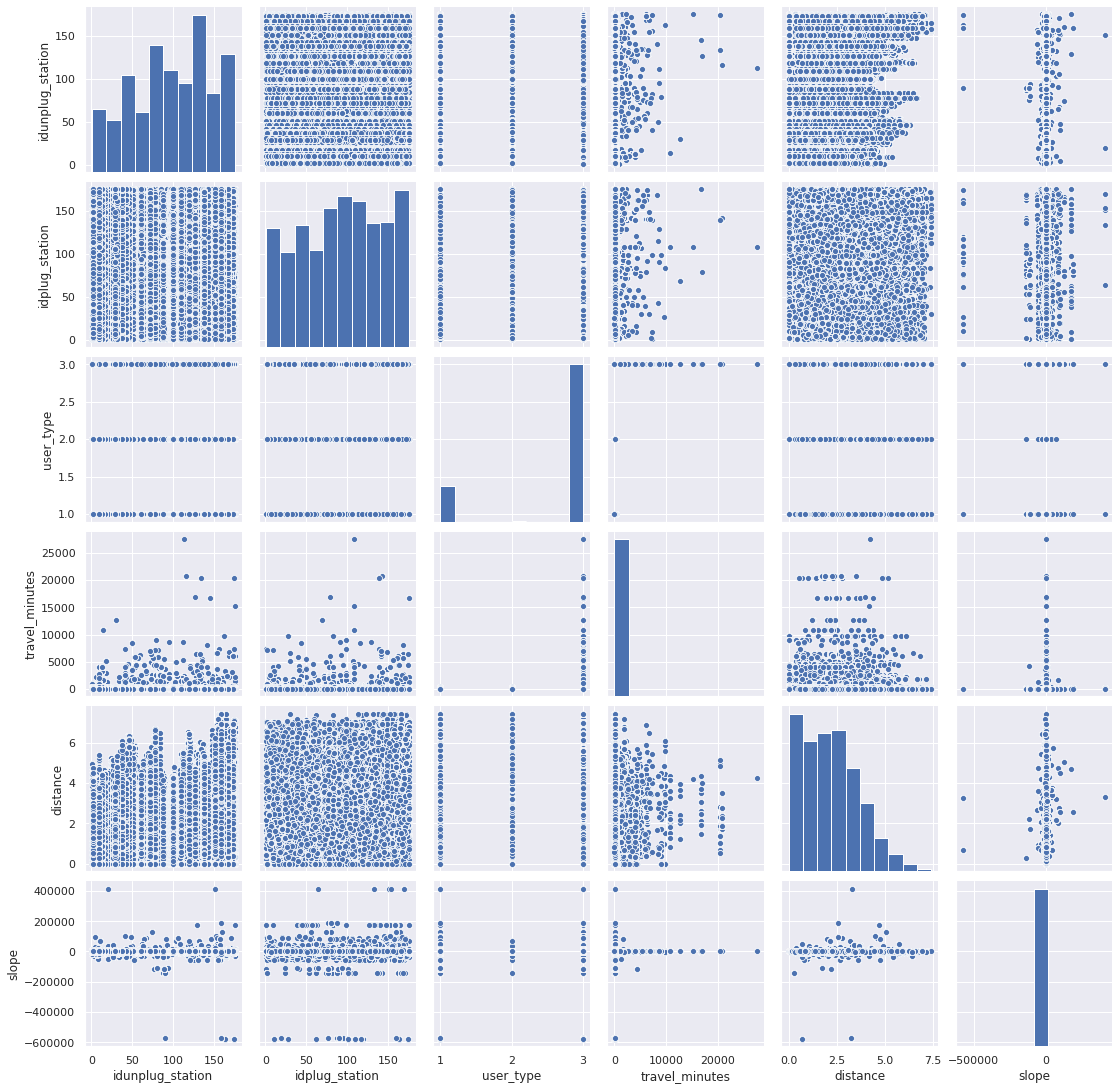

In [ ]:
%%time
sns.set()
sns.pairplot(vble2)